In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def COM(Ms, Xs):
    s = 0
    for i in rage(len(Ms)):
        s += Ms[i]*Xs[i]**2
    
    com = s/sum(Ms)
    
    return com

In [3]:
a = 1.496e+11
b = 12*60*60
c = 1e24


#calucating g in my units
G = 6.11e-11*b**2*c/a**3

In [37]:
#constants:
Ms = [1.989e6,0.330,4.87,5.97,0.642,1898,568,86.8,102]
steps = 1000
ti = 0
tf = 100
N = len(Ms) #number of total bodies

#variabals
Xs = np.zeros((steps, N, 3))
Vs = np.zeros((steps, N, 3))
ts = np.linspace(ti,tf,steps)

Xs[0] = [[-995114.977680456, 8.98124266329700E+05,1.58229931598423E+04],
        [3.44615441391852E+07 ,-5.26557638532672E+07,-7.61286267143204E+06],
        [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
        [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
        [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
        [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
        [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
        [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
        [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

Vs[0] = [[-1.02322911909127E+03,-8.62040073870347E+02,3.22970824014921E+01],
        [2.66853110932131E+06,2.52863729277372E+06,-3.81479438257272E+04],
        [2.35980800402788E+06,-1.88090247751281E+06,-1.62002003392357E+05],
        [-2.57276934940778E+06,-4.78827962928565E+05,-7.40263589142244E+00],
        [-1.82981597359163E+06,1.03827381243802E+06,6.66708767010003E+04],
        [8.91855173066660E+05,7.26974788682208E+05,-2.29741878167567E+04],
        [6.50758615732736E+05,4.56696587751460E+05,-3.39034493618639E+04],
        [-3.75348244065152E+05,4.29216592436392E+05,6.45229544743987E+03],
        [7.88686712937182E+04,4.65184720928017E+05,-1.13436707185877E+04]]


h = np.diff(ts)[0]

def ax(x,y,z,step,i):
    a = 0
    for l in range(N):
        if l!=i:
            r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(x-Xs[step][l][0])/r**3
    return a
#     return -G*x

def ay(x,y,z,step,i):
    a = 0
    
    for l in range(N):
        if l!=i:
            r = ((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(y-Xs[step][l][1])/r**3
    return a
#     return G*y


def az(x,y,z,step,i):
    a = 0
    
    for l in range(N):
        if l != i:
            r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(z-Xs[step][l][2])/r**3
    return a
#     return -G*z


for step in range(1,steps):
    for i in range(N):
        Vs[step][i][0] = Vs[step-1][i][0] + ax(Xs[step-1][i][0],Xs[step-1][i][1],Xs[step-1][i][2],step-1,i)*h/2
        Vs[step][i][1] = Vs[step-1][i][1] + ay(Xs[step-1][i][0],Xs[step-1][i][1],Xs[step-1][i][2],step-1,i)*h/2
        Vs[step][i][2] = Vs[step-1][i][2] + az(Xs[step-1][i][0],Xs[step-1][i][1],Xs[step-1][i][2],step-1,i)*h/2
        
        Xs[step][i][0] = Xs[step-1][i][0] + Vs[step][i][0]*h
        Xs[step][i][1] = Xs[step-1][i][1] + Vs[step][i][1]*h
        Xs[step][i][2] = Xs[step-1][i][2] + Vs[step][i][2]*h
        
        Vs[step][i][0] = Vs[step][i][0] + ax(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2
        Vs[step][i][1] = Vs[step][i][1] + ay(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2
        Vs[step][i][2] = Vs[step][i][2] + az(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2

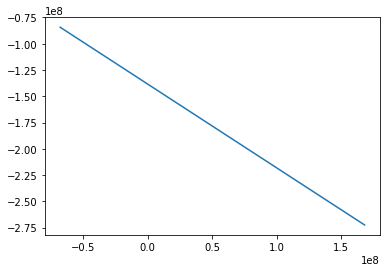

In [38]:
plt.plot([Xs[step][2][0] for step in range(steps)],[Xs[step][2][1] for step in range(steps)])
# plt.xlim(-272449987.2414148,-84359739.4901336)

In [6]:
xxs = [Xs[step][2][0] for step in range(steps)]

In [7]:
print(min(xxs))
print(max(xxs))

-67777993.816801
168202804.73423365


In [24]:
for i in range(20):
    if i%2 == 0:
        continue
    elif i%10==7:
        break
    else:
        print(i)

1
3
5


In [40]:
9000-7400-300+600

1900